# 인공지능챌린지 2번 문제

## SETUP

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# 한글 폰트 설정
from matplotlib import font_manager, rc
f_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [4]:
sns.set_theme(style="whitegrid")

In [43]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/sample_submission.csv')

In [22]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,023a9418cf67b0,18b16ec699d8b6,0000a43bce5eec,0,0,200.00,2,0,1,21,...,0,0.0,0,0.0,0,0,73.970,1,1474,0.3333
1,6703bc191cff0a,18b16ec699d8b6,0000a43bce5eec,0,1,19.35,0,0,0,61,...,0,0.0,0,0.0,0,0,189.400,1,1484,0.3333
2,5a3afae17b53c0,236ab9e9c081b9,0000a43bce5eec,0,0,66.65,0,0,0,93,...,0,0.0,0,0.0,0,0,17.510,1,1430,0.0370
3,e431d8a8f6c99b,236ab9e9c081b9,0000a43bce5eec,0,0,21.29,0,0,0,92,...,0,0.0,0,0.0,0,0,5.201,1,1503,0.0370
4,e7b325d63d8393,236ab9e9c081b9,0000a43bce5eec,0,0,0.00,0,0,0,91,...,0,0.0,0,0.0,0,0,18.650,1,1450,0.0370


### 변수 설명

DBNOs - Number of enemy players knocked.

assists - Number of enemy players this player damaged that were killed by teammates.

boosts - Number of boost items used.

damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.

headshotKills - Number of enemy players killed with headshots.

heals - Number of healing items used.

Id - Player’s Id

killPlace - Ranking in match of number of enemy players killed.

killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking 
where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 
in killPoints should be treated as a “None”.

killStreaks - Max number of enemy players killed in a short amount of time.

kills - Number of enemy players killed.

longestKill - Longest distance between player and player killed at time of death. 
This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

matchDuration - Duration of match in seconds.

matchId - ID to identify match. There are no matches that are in both the training and testing set.

rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

revives - Number of times this player revived teammates.
rideDistance - Total distance traveled in vehicles measured in meters.

roadKills - Number of kills while in a vehicle.
swimDistance - Total distance traveled by swimming measured in meters.

teamKills - Number of times this player killed a teammate.

vehicleDestroys - Number of vehicles destroyed.

walkDistance - Total distance traveled on foot measured in meters.

weaponsAcquired - Number of weapons picked up.

winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.

numGroups - Number of groups we have data for in the match.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## 전처리 & EDA

In [23]:
train.shape

(70248, 28)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70248 entries, 0 to 70247
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               70248 non-null  object 
 1   groupId          70248 non-null  object 
 2   matchId          70248 non-null  object 
 3   assists          70248 non-null  int64  
 4   boosts           70248 non-null  int64  
 5   damageDealt      70248 non-null  float64
 6   DBNOs            70248 non-null  int64  
 7   headshotKills    70248 non-null  int64  
 8   heals            70248 non-null  int64  
 9   killPlace        70248 non-null  int64  
 10  killPoints       70248 non-null  int64  
 11  kills            70248 non-null  int64  
 12  killStreaks      70248 non-null  int64  
 13  longestKill      70248 non-null  float64
 14  matchDuration    70248 non-null  int64  
 15  maxPlace         70248 non-null  int64  
 16  numGroups        70248 non-null  int64  
 17  rankPoints  

In [25]:
train.drop(columns=['Id','groupId','matchId'],axis=1,inplace=True)
test.drop(columns=['Id','groupId','matchId'],axis=1,inplace=True)

In [26]:
train_corr = train.corr()
abs(train_corr['winPlacePerc']).sort_values(ascending=False)

winPlacePerc       1.000000
walkDistance       0.827392
killPlace          0.696691
boosts             0.636430
weaponsAcquired    0.607103
heals              0.440356
damageDealt        0.430466
longestKill        0.407218
kills              0.404063
killStreaks        0.348250
rideDistance       0.341738
assists            0.340417
DBNOs              0.327832
revives            0.276353
headshotKills      0.257854
swimDistance       0.150897
vehicleDestroys    0.073801
roadKills          0.030468
rankPoints         0.022858
numGroups          0.019121
teamKills          0.011793
maxPlace           0.007754
killPoints         0.007231
matchDuration      0.003423
winPoints          0.002586
Name: winPlacePerc, dtype: float64

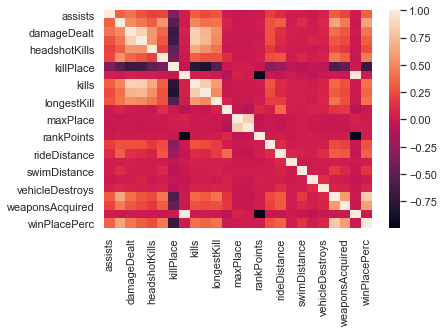

In [27]:
sns.heatmap(train_corr)
plt.show()

In [28]:
train_keys = train.keys()
train_keys

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

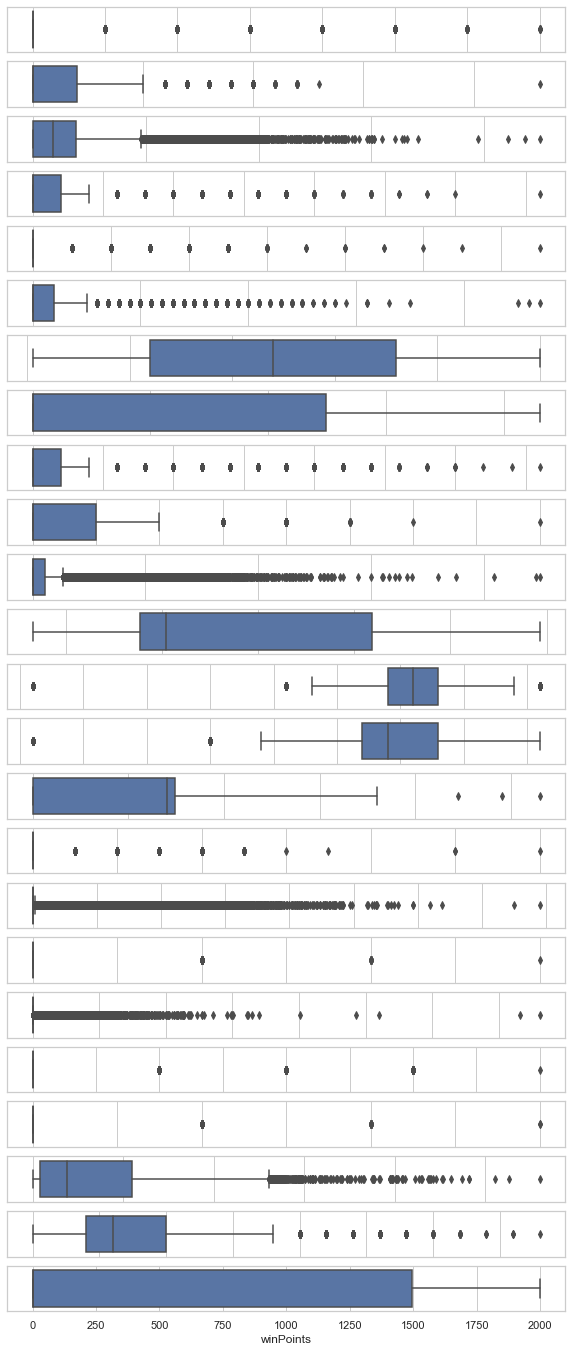

In [53]:
## 데이터 분포와 이상치 확인
plt.figure(figsize=(10,24))

for i in range(1,25):
    plt.subplot(24,1,i)
    sns.boxplot(data=train,
               x=train_keys[i-1])
    
plt.show()

## 모델 학습

In [38]:
from pycaret.regression import *
py_reg = setup(data = train, target = 'winPlacePerc', train_size = 0.7)

,Description,Value
0,session_id,7463
1,Target,winPlacePerc
2,Original Data,"(70248, 25)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,13
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(35124, 143)"


In [39]:
top3 = compare_models(sort='MAE', n_select=3, fold=2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0628,0.0072,0.0848,0.9261,0.0567,0.2265,4.8500
xgboost,Extreme Gradient Boosting,0.0639,0.0076,0.0870,0.9222,0.0579,0.2266,4.3050
lightgbm,Light Gradient Boosting Machine,0.0654,0.0078,0.0882,0.9200,0.0590,0.2332,0.9050
rf,Random Forest Regressor,0.0697,0.0090,0.0949,0.9076,0.0633,0.2507,10.9100
et,Extra Trees Regressor,0.0705,0.0092,0.0959,0.9055,0.0640,0.2563,13.5550
gbr,Gradient Boosting Regressor,0.0734,0.0100,0.0998,0.8977,0.0667,0.2657,4.1850
ridge,Ridge Regression,0.0833,0.0121,0.1102,0.8752,0.0742,0.3440,0.2300
br,Bayesian Ridge,0.0833,0.0121,0.1102,0.8752,0.0742,0.3438,0.5000
lr,Linear Regression,0.0834,0.0122,0.1103,0.8750,0.0742,0.3444,0.2300
omp,Orthogonal Matching Pursuit,0.0861,0.0130,0.1138,0.8669,0.0768,0.3603,1.9200


In [40]:
blend_models = blend_models(estimator_list = top3, fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0625,0.0071,0.0845,0.9268,0.0564,0.2198
1,0.0631,0.0073,0.0855,0.9246,0.0570,0.2286
Mean,0.0628,0.0072,0.0850,0.9257,0.0567,0.2242
SD,0.0003,0.0001,0.0005,0.0011,0.0003,0.0044


In [34]:
tune_model = tune_model(blend_models, fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0618,0.0071,0.0842,0.9263,0.0562,0.2235
1,0.0622,0.0071,0.0843,0.9274,0.0566,0.2264
Mean,0.0620,0.0071,0.0842,0.9268,0.0564,0.2250
SD,0.0002,0.0000,0.0000,0.0005,0.0002,0.0015


## 예측

In [41]:
y_pred = predict_model(blend_models, data= test)

In [44]:
sub['winPlacePerc'] = y_pred['Label']
sub= sub.set_index('Id')
sub

,winPlacePerc
Id,
94a6853fa03acd,0.114031
1209697b6692fd,0.061316
0a5d0fe9d96bee,0.044254
d739f0784af7d5,0.130226
0bd7c9d014c3e8,0.093169
...,...
ec65a03d1cd842,0.032299
ce24e7b3647325,0.082639
c8b9a7f6a6e8c1,0.022464


In [45]:
sub.to_csv('2-5.csv')